In [1094]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler

In [1095]:
df=pd.read_csv(r"C:\Users\amuke\Downloads\archive (4)\Bengaluru_House_Data.csv")

In [1096]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [1097]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [1098]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [1099]:
size_split = df['size'].str.split(' ', expand=True)

In [1100]:
size_split[1]=df['size'].str.split(' ',expand=True)[1].replace('Bedroom','BHK')
df['size']=size_split[0]+' '+size_split[1]

In [1101]:
df.drop('society',axis=1,inplace=True)

In [1102]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [1103]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [1104]:
df['location'].fillna('Whitefield',inplace=True)

In [1105]:
df['size'].fillna('2 BHK',inplace=True)

In [1106]:
df['bath'].fillna(2.0,inplace=True)

In [1107]:
df['balcony'].fillna(2.0,inplace=True)

In [1108]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [1109]:
def convert_sqft_to_num(x):
    try:
       
        if '-' in x:
            sqft_range = x.split('-')
            return (float(sqft_range[0]) + float(sqft_range[1])) / 2
      
        return float(x)
    except:
        return None  

In [1110]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])

In [1111]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [1112]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


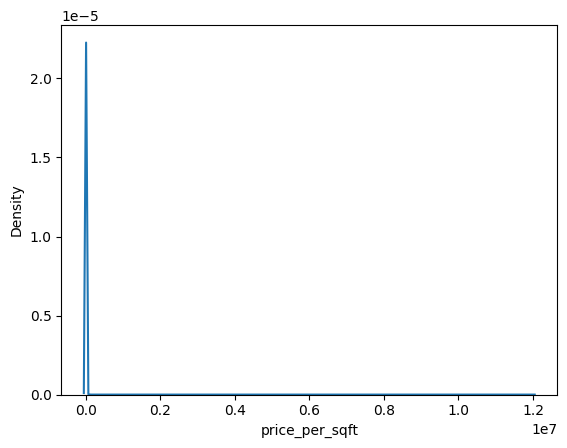

In [1113]:
sns.kdeplot(df['price_per_sqft'])
plt.show()

In [1114]:
Q1=df['price_per_sqft'].quantile(.25)
Q3=df['price_per_sqft'].quantile(.75)


In [1115]:
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [1116]:
df=df[(df['price_per_sqft']<max) & (df['price_per_sqft']>min)]

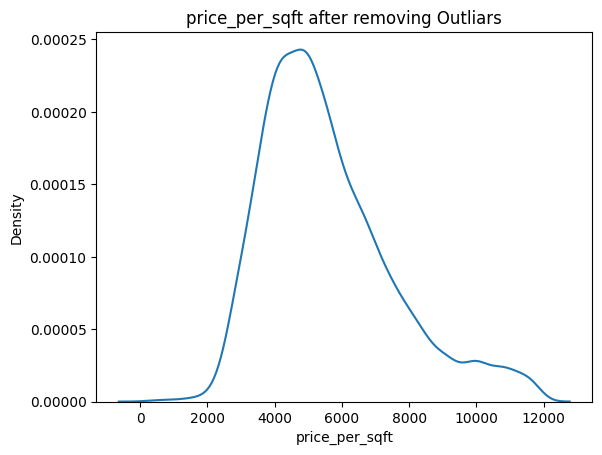

In [1117]:
sns.kdeplot(df['price_per_sqft'])
plt.title('price_per_sqft after removing Outliars')
plt.show()

In [1118]:
df.describe()

,total_sqft,bath,balcony,price,price_per_sqft
count,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,1519.349365,2.530568,1.594536,87.926729,5573.904031
std,1197.577583,1.108608,0.791363,73.560498,1959.533833
min,276.000000,1.000000,0.000000,8.000000,267.829813
25%,1100.000000,2.000000,1.000000,48.000000,4166.666667
50%,1270.000000,2.000000,2.000000,67.000000,5188.679245
75%,1639.875000,3.000000,2.000000,100.000000,6603.676247
max,52272.000000,27.000000,3.000000,2100.000000,11875.000000


In [1119]:
df['location'].value_counts()

location
Whitefield                                         514
Sarjapur  Road                                     386
Electronic City                                    299
Kanakpura Road                                     270
Thanisandra                                        232
                                                  ... 
Okalipura                                            1
Vasantapura main road                                1
Rajarajeshwarinagar                                  1
Himagiri Meadows                                     1
12th cross srinivas nagar banshankari 3rd stage      1
Name: count, Length: 1168, dtype: int64

In [1120]:
location_counts = df['location'].value_counts()

In [1121]:
location_counts[location_counts <= 10].index

Index(['Cox Town', 'Nagappa Reddy Layout', 'Banashankari Stage VI', 'Kalkere',
       'Basapura', 'Kodihalli', 'Laggere', 'Bommenahalli', 'Shivaji Nagar',
       'Marsur',
       ...
       'Sadduguntepalya', 'Shirdi Sai Nagar', 'S R Layout', 'Vidyapeeta',
       'Maruthi Extension', 'Okalipura', 'Vasantapura main road',
       'Rajarajeshwarinagar', 'Himagiri Meadows',
       '12th cross srinivas nagar banshankari 3rd stage'],
      dtype='object', name='location', length=954)

In [1122]:

location_counts = df['location'].value_counts()
locations_to_replace = location_counts[location_counts <= 10].index


df['location'] = df['location'].replace(locations_to_replace, 'Other')


In [1123]:
df['BHK']=df['size'].str.split(' ', expand=True)[0]

In [1124]:
df.drop(columns=['size','balcony'],inplace=True)

In [1125]:
df.head()

,area_type,availability,location,total_sqft,bath,price,price_per_sqft,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,3699.810606,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4615.384615,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,4305.555556,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,6245.890861,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,4250.000000,2


In [1126]:
df['BHK']=df['BHK'].astype(float)

In [1127]:
df.describe()

,total_sqft,bath,price,price_per_sqft,BHK
count,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,1519.349365,2.530568,87.926729,5573.904031,2.646677
std,1197.577583,1.108608,73.560498,1959.533833,1.051335
min,276.000000,1.000000,8.000000,267.829813,1.000000
25%,1100.000000,2.000000,48.000000,4166.666667,2.000000
50%,1270.000000,2.000000,67.000000,5188.679245,2.000000
75%,1639.875000,3.000000,100.000000,6603.676247,3.000000
max,52272.000000,27.000000,2100.000000,11875.000000,27.000000


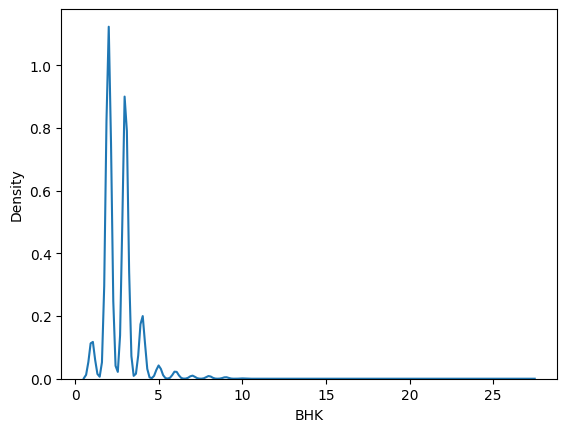

In [1128]:
sns.kdeplot(df['BHK'])
plt.show()

In [1129]:
Q1=df['BHK'].quantile(.25)
Q3=df['BHK'].quantile(.75)

In [1130]:
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [1131]:

df=df[(df['BHK']<max) & (df['BHK']>min)]

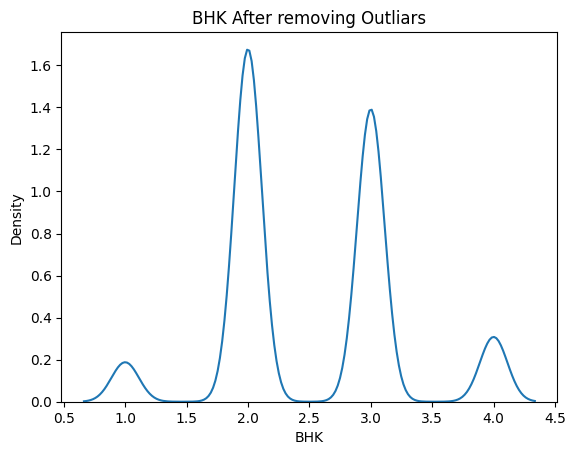

In [1132]:
sns.kdeplot(df['BHK'])
plt.title('BHK After removing Outliars')
plt.show()

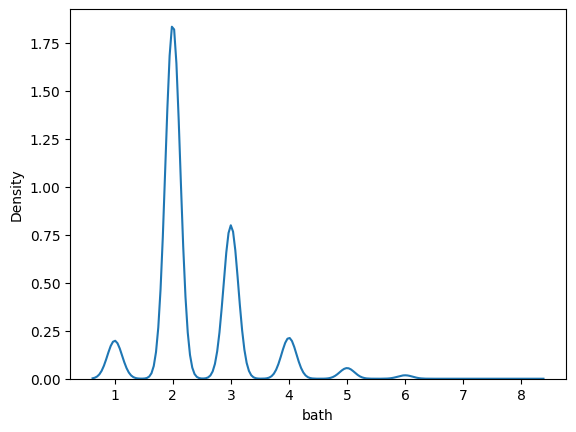

In [1133]:
sns.kdeplot(df['bath'])
plt.show()

In [1134]:
Q1=df['bath'].quantile(.25)
Q3=df['bath'].quantile(.75)
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR
df=df[(df['bath']<max) & (df['bath']>min)]

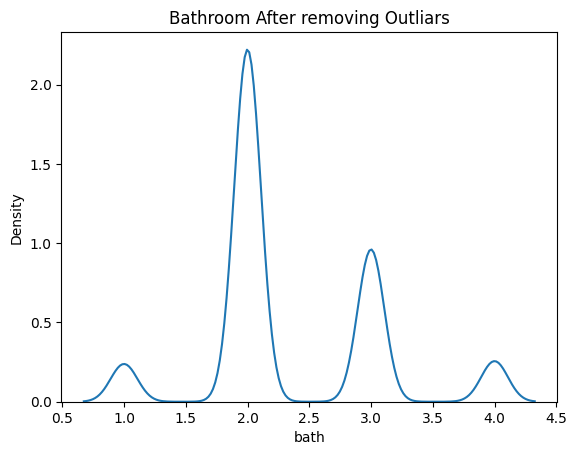

In [1135]:
sns.kdeplot(df['bath'])
plt.title('Bathroom After removing Outliars')
plt.show()

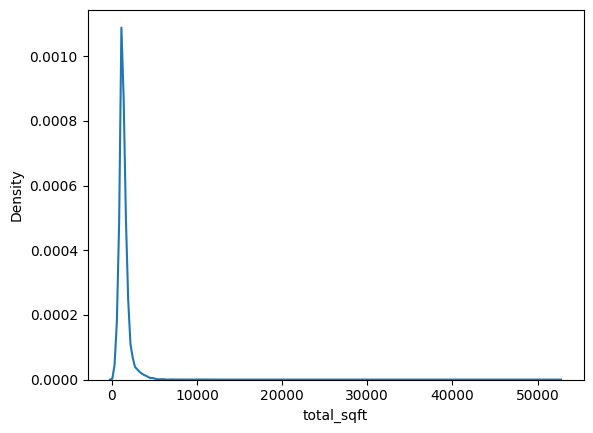

In [1136]:
sns.kdeplot(df['total_sqft'])
plt.show()

In [1137]:
Q1=df['total_sqft'].quantile(.25)
Q3=df['total_sqft'].quantile(.75)
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR
df=df[(df['total_sqft']<max) & (df['total_sqft']>min)]

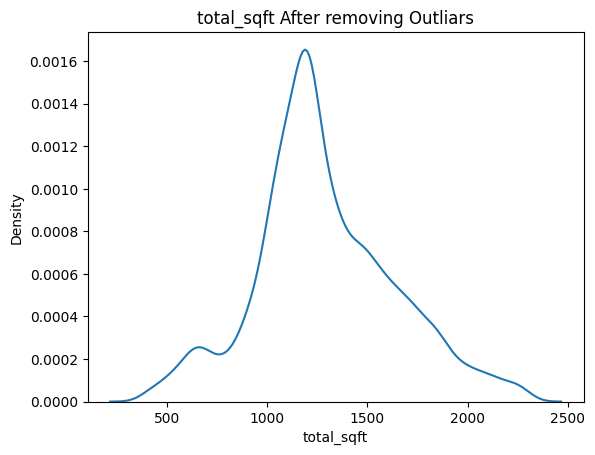

In [1138]:
sns.kdeplot(df['total_sqft'])
plt.title('total_sqft After removing Outliars')
plt.show()

In [1139]:
df.head()

,area_type,availability,location,total_sqft,bath,price,price_per_sqft,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,3699.810606,2.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,4305.555556,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,6245.890861,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,4250.000000,2.0
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,38.00,3247.863248,2.0


In [1140]:
df.describe()

,total_sqft,bath,price,price_per_sqft,BHK
count,10550.000000,10550.000000,10550.000000,10550.000000,10550.000000
mean,1288.586674,2.260000,70.308419,5340.233762,2.405118
std,350.133518,0.629919,34.606626,1759.875208,0.643225
min,381.000000,1.000000,8.440000,625.185185,1.000000
25%,1080.000000,2.000000,46.000000,4083.508403,2.000000
50%,1230.000000,2.000000,62.000000,5000.000000,2.000000
75%,1500.000000,3.000000,86.000000,6250.000000,3.000000
max,2302.500000,4.000000,260.000000,11875.000000,4.000000


In [1141]:
df.drop(columns=['availability'],inplace=True)

In [1142]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('price',axis=1),df['price'],test_size=.2,random_state=0)

In [1143]:
x_train

,area_type,location,total_sqft,bath,price_per_sqft,BHK
2438,Super built-up Area,Electronic City Phase II,1031.0,2.0,5465.567410,2.0
9473,Super built-up Area,Rachenahalli,985.0,2.0,5073.096447,2.0
189,Super built-up Area,Marathahalli,1200.0,2.0,4333.333333,2.0
4872,Super built-up Area,Hegde Nagar,2006.8,4.0,9766.792904,3.0
12229,Super built-up Area,Kanakpura Road,1450.0,3.0,3517.241379,3.0
...,...,...,...,...,...,...
11678,Super built-up Area,Hosur Road,1685.0,3.0,5341.246291,3.0
6141,Super built-up Area,Hennur Road,1232.0,2.0,7224.025974,2.0
4117,Super built-up Area,Other,1080.0,2.0,4166.666667,2.0
12444,Super built-up Area,Thanisandra,1100.0,2.0,3272.727273,2.0


In [1144]:
from sklearn.preprocessing import PowerTransformer


In [1145]:
trf=ColumnTransformer(transformers=[('OHE',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['location','area_type'])],
                      remainder='passthrough',
                      force_int_remainder_cols=False)

In [1146]:
scale=StandardScaler()


In [1147]:
lr=LinearRegression()

In [1148]:
pipe=make_pipeline(trf,scale,lr)

In [1149]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [1150]:

y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.966282259347528

In [1151]:
from sklearn.model_selection import cross_val_score

In [1152]:
cross_val_score(pipe,x_train,y_train,cv=10,scoring='r2').mean()

0.9643770071855577

In [1153]:
ridge=Ridge()
pipe=make_pipeline(trf,scale,ridge)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9662435715908463

In [1154]:
lasso=Lasso()
pipe=make_pipeline(trf,scale,lasso)
pipe.fit(x_train,y_train)
y_pred_l=pipe.predict(x_test)
r2_score(y_test,y_pred_l)

0.9597231644100732

In [1155]:
dt=DecisionTreeRegressor()
pipe=make_pipeline(trf,scale,dt)
pipe.fit(x_train,y_train)
y_pred_d=pipe.predict(x_test)
r2_score(y_test,y_pred_d)

0.9976433457846114

In [1156]:
df.shape

(10550, 7)

In [1157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10550 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10550 non-null  object 
 1   location        10550 non-null  object 
 2   total_sqft      10550 non-null  float64
 3   bath            10550 non-null  float64
 4   price           10550 non-null  float64
 5   price_per_sqft  10550 non-null  float64
 6   BHK             10550 non-null  float64
dtypes: float64(5), object(2)
memory usage: 659.4+ KB
